In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from matplotlib import pyplot as plt
from PIL import Image

In [2]:
#Reading Training and Testing data
train_data = pd.read_csv('archive/Train.csv')
test_data = pd.read_csv('archive/Test.csv')

train_data['ClassId'] = train_data['ClassId'].astype(str)
test_data['ClassId'] = test_data['ClassId'].astype(str)

#Converting single digits to double digit
def checklength(x):
    if len(x) == 1:
        return '0' + x
    else:
        return x
train_data['ClassId'] = train_data['ClassId'].apply(lambda x: checklength(x))
test_data['ClassId'] = test_data['ClassId'].apply(lambda x: checklength(x))

In [3]:
#Splitting the data into training and validation set
X_train, X_val = train_test_split(train_data, test_size=0.2, random_state=42)

In [4]:
#Reading the images
train_data_gen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

validation_data_gen = ImageDataGenerator(
    rescale=1./255
)

test_data_gen = ImageDataGenerator(
    rescale=1./255
)

train_set = train_data_gen.flow_from_dataframe(
    dataframe=X_train,
    directory='archive/',
    x_col='Path',
    y_col='ClassId',
    target_size=(30, 30),
    batch_size=64,
    class_mode='categorical'
)

validation_set = validation_data_gen.flow_from_dataframe(
    dataframe=X_val,
    directory='archive/',
    x_col='Path',
    y_col='ClassId',
    target_size=(30, 30),
    batch_size=64,
    class_mode='categorical'
)

test_set = test_data_gen.flow_from_dataframe(
    dataframe=test_data,
    directory='archive/',
    x_col='Path',
    y_col='ClassId',
    target_size=(30, 30),
    batch_size=64,
    class_mode='categorical'
)

Found 31367 validated image filenames belonging to 43 classes.
Found 7842 validated image filenames belonging to 43 classes.
Found 12630 validated image filenames belonging to 43 classes.


In [5]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=5, activation='relu', input_shape=[30, 30, 3]))
model.add(Conv2D(filters=32, kernel_size=5, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))
model.add(Dropout(rate=0.25))          
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))  
model.add(MaxPool2D(pool_size=2, strides=2))
model.add(Dropout(rate=0.25)) 
model.add(Flatten())
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(rate=0.5))          
model.add(Dense(units=43, activation='softmax'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 64)          18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 64)          0

In [6]:
#Training the model with train_set and validation_set
history = model.fit(x = train_set, validation_data = validation_set, epochs = 15)

Epoch 1/15
491/491 [==============================] - 206s 414ms/step - loss: 2.1685 - accuracy: 0.3728 - val_loss: 0.9711 - val_accuracy: 0.7100
Epoch 2/15
491/491 [==============================] - 217s 443ms/step - loss: 0.9067 - accuracy: 0.7015 - val_loss: 0.4187 - val_accuracy: 0.8685
Epoch 3/15
491/491 [==============================] - 202s 410ms/step - loss: 0.5822 - accuracy: 0.8068 - val_loss: 0.2414 - val_accuracy: 0.9232
Epoch 4/15
491/491 [==============================] - 211s 430ms/step - loss: 0.4408 - accuracy: 0.8545 - val_loss: 0.1813 - val_accuracy: 0.9443
Epoch 5/15
491/491 [==============================] - 211s 431ms/step - loss: 0.3703 - accuracy: 0.8784 - val_loss: 0.1396 - val_accuracy: 0.9589
Epoch 6/15
491/491 [==============================] - 230s 468ms/step - loss: 0.3178 - accuracy: 0.8953 - val_loss: 0.1132 - val_accuracy: 0.9666
Epoch 7/15
491/491 [==============================] - 194s 395ms/step - loss: 0.2834 - accuracy: 0.9068 - val_loss: 0.0913 -

In [7]:
#Evaluating the model on test_set
model.evaluate(test_set)

198/198 [==============================] - 40s 203ms/step - loss: 0.1820 - accuracy: 0.9500


[0.18200621008872986, 0.9500395655632019]

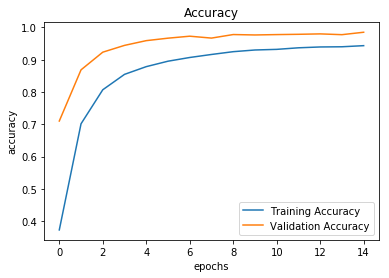

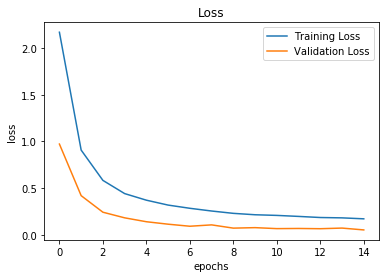

In [8]:
#Evaluating the Accuracy and Loss
plt.figure(0)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

C:\Users\Jaydeep\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


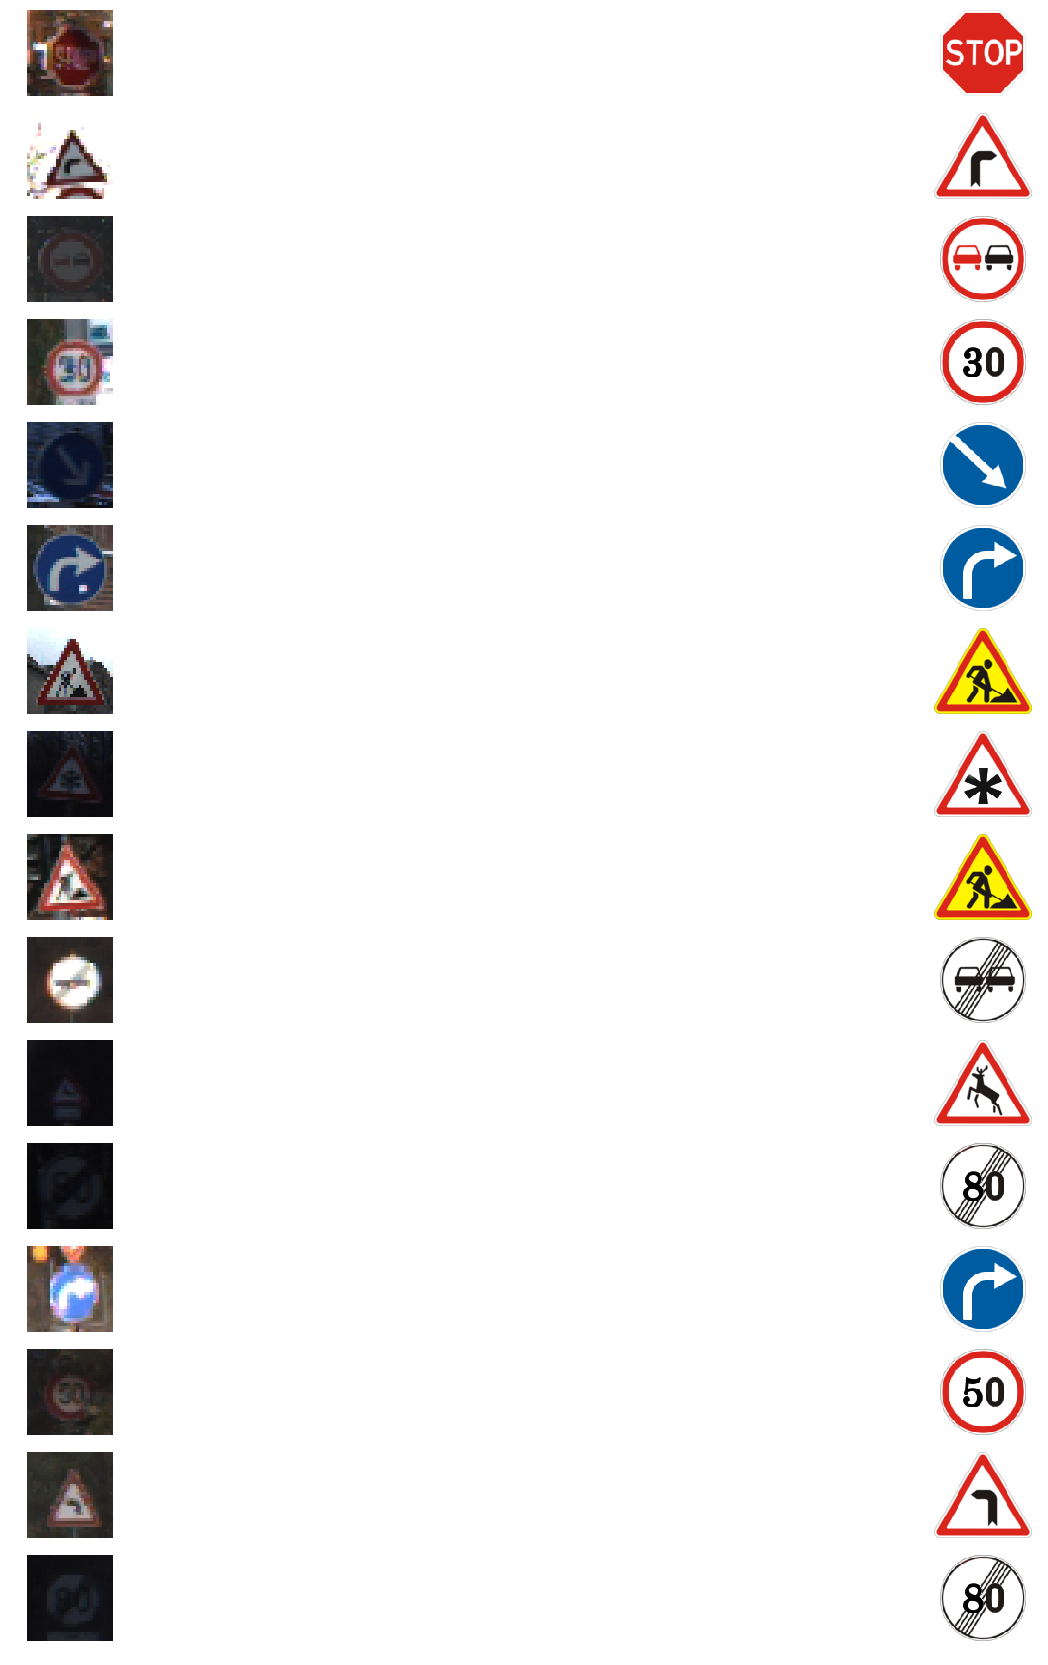

In [9]:
from PIL import Image
test_batch = 2
plt.figure(figsize=(30, 30))
plt.tight_layout()
for i in range(0, 16):
    plt.subplot(16, 2, 2 * i + 1), plt.axis('off')
    plt.imshow(test_set[test_batch][0][i])
    pre = model.predict_classes(test_set[test_batch][0])
    img = Image.open('archive/Meta/' + str(pre[i]) + '.png')
    plt.subplot(16, 2, 2 * i + 2), plt.axis('off')
    plt.imshow(img)

In [10]:
#Saving the model
model.save('GSTRB-Final.h5')